In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [29]:
#loading dataset
data_set = pd.read_csv("/Users/navi/Downloads/Mall_Customers (1).csv")

In [30]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [31]:
data_set.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
data_set.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [33]:
data_set.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [34]:
nRow, nCol = data_set.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 200 rows and 5 columns


In [35]:
df = data_set


In [36]:
df1 = df[["Annual Income (k$)","Spending Score (1-100)"]]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0.5, 1.0, 'Spending Score vs Age')

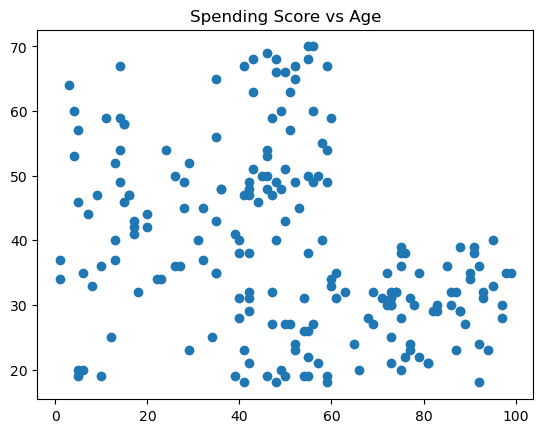

In [37]:
plt.scatter(x = df["Spending Score (1-100)"], y = df['Age'])
plt.title('Spending Score vs Age')

Text(0.5, 1.0, 'Spending Score vs Income')

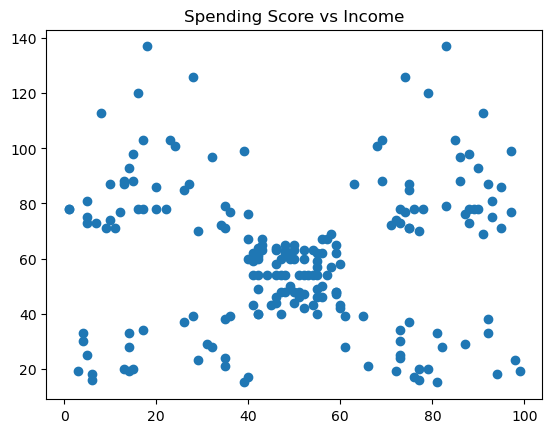

In [38]:
plt.scatter(x = df["Spending Score (1-100)"], y = df['Annual Income (k$)'])
plt.title('Spending Score vs Income')

the above plot is a good example that can be used for clustering the different groups

Text(0.5, 1.0, 'Age vs Income')

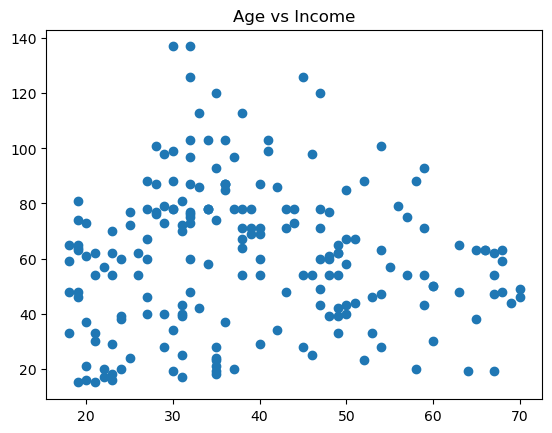

In [39]:
#plt.figure(figsize(10,12))
plt.scatter(x = df["Age"], y = df['Annual Income (k$)'])
plt.title('Age vs Income')


In [40]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score


In [42]:
model = KMeans(n_clusters = 2)
y_km = model.fit_predict(df1)
y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [43]:
#Predict Centroids 

print(model.cluster_centers_)

[[79.6        50.12727273]
 [37.28888889 50.28888889]]


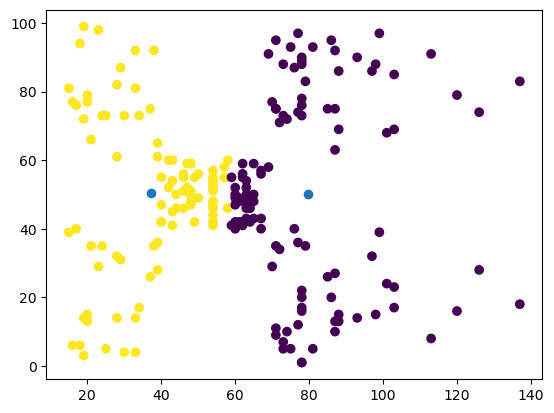

In [44]:
plt.scatter(df1['Annual Income (k$)'],df1["Spending Score (1-100)"], c = y_km)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1])

In [46]:
#Elbow Method 

sse = []
for k in range(3, 8):
    km = KMeans(n_clusters=k)
    km.fit(df1)
    sse.append(km.inertia_)

In [48]:
wcss=[]
for k in range(3,11):
    km=KMeans(n_clusters=k)
    km.fit(df1)
    wcss.append(km.inertia_)

Text(0, 0.5, 'SSE')

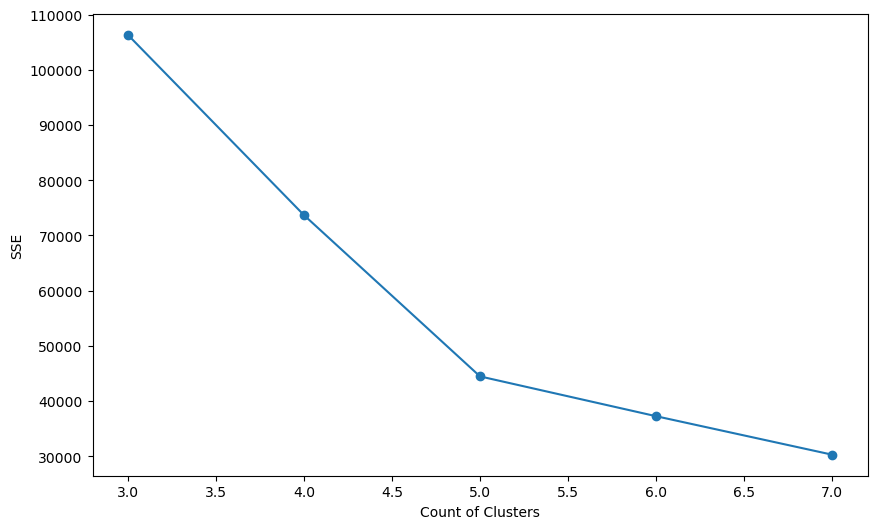

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(range(3, 8), sse, '-o')
plt.xlabel('Count of Clusters')
plt.ylabel('SSE')

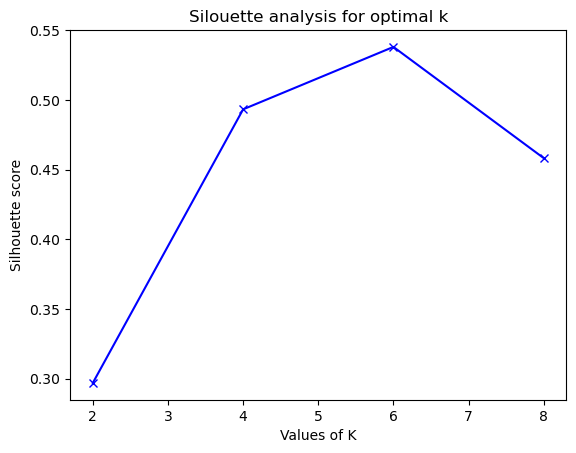

In [51]:
range_n_clusters = [2,4,6,8]
silhouette_avg=[]

for num_clusters in range_n_clusters:
    #initialize kmeans 
    kmeans=KMeans(n_clusters=num_clusters)
    kmeans.fit(df1)
    cluster_labels=kmeans.labels_
    
    #silhouette score `````
    silhouette_avg.append(silhouette_score(df1, cluster_labels))
    
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silouette analysis for optimal k')
plt.show()

In [52]:
#using elbow method

model = KMeans(n_clusters=5)


In [53]:
y_kmeans = model.fit_predict(df1)
print(y_kmeans)

[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 3 0 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 4 1 3 1 4 1 4 1 3 1 4 1 4 1 4 1 4 1 3 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


In [54]:
print(model.cluster_centers_)

[[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [88.2        17.11428571]]


In [55]:
df_copy=df1

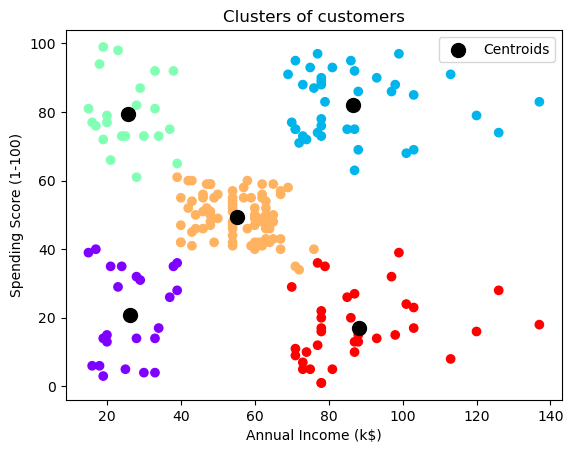

In [58]:
plt.scatter(df_copy['Annual Income (k$)'],df_copy["Spending Score (1-100)"], c = y_kmeans, cmap = 'rainbow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 100,c = "black",label = "Centroids")
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

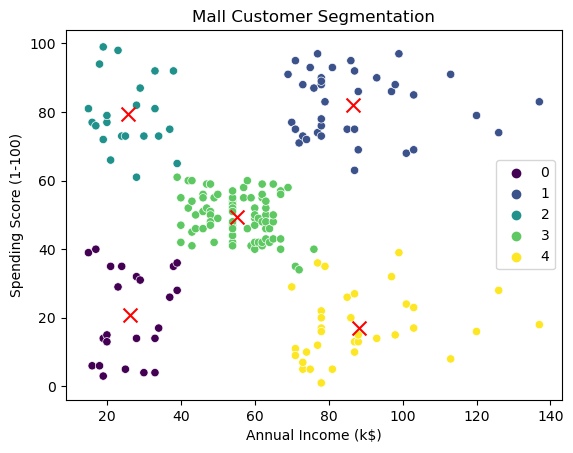

In [63]:
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customer Segmentation')
labels=model.labels_
sns.scatterplot(x=df_copy['Annual Income (k$)'],y=df_copy['Spending Score (1-100)'],hue=labels,palette='viridis')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='x', color='red', s=100)
plt.show()

In [69]:
data_set['Cluster']=model.predict(data_set[['Annual Income (k$)','Spending Score (1-100)']])
data_set.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [77]:
data_set.Cluster.value_counts()


3    81
1    39
4    35
0    23
2    22
Name: Cluster, dtype: int64

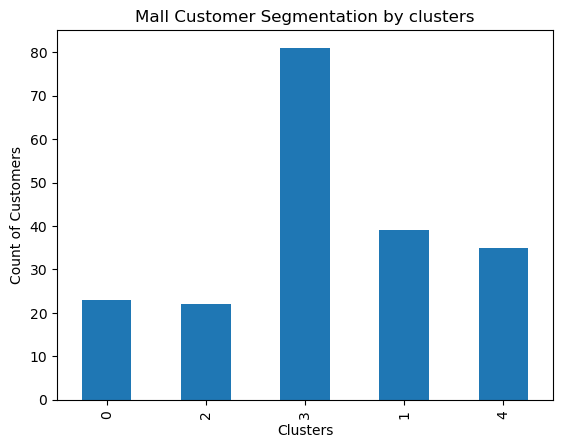

In [80]:
data_set.Cluster.value_counts()[data_set.Cluster.unique()].plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Count of Customers')
plt.title('Mall Customer Segmentation by clusters')
plt.show()

In [81]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Cluster                 200 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 8.7+ KB


In [82]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [87]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('/Users/navi/Downloads/Mall_Customers (1).csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Mall_Customers.csv'

There are 200 rows and 5 columns


In [91]:
import warnings
warnings.filterwarnings('ignore')

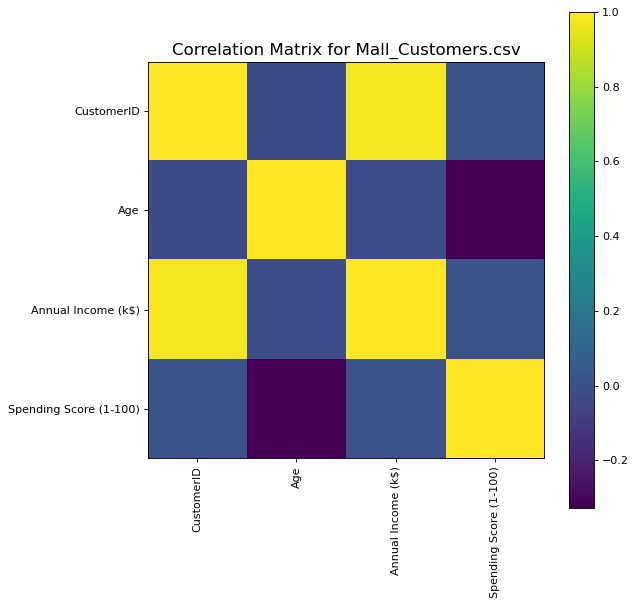

In [92]:
plotCorrelationMatrix(df1, 8)
plt.show()